In [1]:
import numpy as np
import pandas as pd
import tmm

In [2]:
# Read the raw data file, skip the first three rows without a header and select the following 51 rows
raw_data = pd.read_csv('25 nm of SiO2.dat', sep = '\t', skiprows=3 , nrows=51 , header=None)
#Rename the columns of the raw data frame into relevant features
raw_data.columns = ['lambda_vac', 'th_0', 'psi_exp', 'delta_exp', 'psi_exp_sigma', 'delta_exp_sigma']

In [3]:
# imports and setup for tmm
from __future__ import division, print_function, absolute_import

from tmm import (coh_tmm, unpolarized_RT, ellips,
                       position_resolved, find_in_structure_with_inf)

from numpy import pi, linspace, inf, array
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline


# "5 * degree" is 5 degrees expressed in radians
# "1.2 / degree" is 1.2 radians expressed in degrees
degree = pi/180

In [4]:
#import Si and SiO2 data from file named 'materials'
from materials import (Si_nk_fn,SiO2_nk_fn)

In [5]:
def MSE( thickness ):
    d_list = [inf,thickness,inf] #in nm
    lambda_list = linspace(300,800,51) #in nm
    
    # calculate psi and delta 
    psi_mod=[]
    delta_mod=[]

    for lambda_vac in lambda_list:
                n_list = [1,SiO2_nk_fn(lambda_vac),Si_nk_fn(lambda_vac)]
                e_data=ellips(n_list, d_list, 65*degree, lambda_vac) #in nm
                psi_mod.append(e_data['psi']/degree) # angle in degrees
                delta_mod.append((pi-e_data['Delta'])/degree) # angle in degrees
    # make a dataframe with the values from the model
    mod=pd.DataFrame({"psi_mod":psi_mod,
                       "delta_mod":delta_mod})
        # calculate error
    xi=((mod['psi_mod'] - raw_data['psi_exp'])/(raw_data['psi_exp_sigma']))**2+((mod['delta_mod'] - raw_data['delta_exp'])/(raw_data['delta_exp_sigma']))**2
    MSE=(xi.sum(axis=0)/(2*len(xi)-1))**(1/2)

    return MSE

In [10]:
from scipy.optimize import fsolve
c = lambda x: MSE(x)

initial_guess = 20

thickness_x = fsolve(func=c, x0=initial_guess)

print('Optimum thickness=',thickness_x[0],'nm')

Optimum thickness= 25.26349668884727 nm


C:\Users\raulm\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


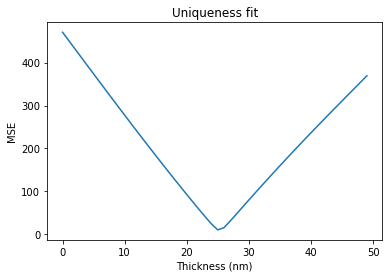

In [7]:
"Uniquenes fit:  this is a usefull step to check that the minimum is a global or localminimum"
MSE_calc=[]
thickness_calc=[]
for x in range(0,50):
    thickness_calc.append(x)
    MSE_calc.append(MSE(x))
MSE_data=pd.DataFrame({"thickness":thickness_calc,
                       "MSE":MSE_calc})
plt.figure()
plt.plot(MSE_data.thickness,MSE_data.MSE)
plt.xlabel('Thickness (nm)')
plt.ylabel('MSE')
plt.title('Uniqueness fit');

In [8]:
# calculate the modeled ellipsometric data using the optimum thickness
thickness=25.26349668884727 
d_list = [inf,thickness,inf] #in nm
lambda_list = linspace(300,800,51) #in nm

# calculate psi and delta 
psi_mod=[]
delta_mod=[]

for lambda_vac in lambda_list:
                n_list = [1,SiO2_nk_fn(lambda_vac),Si_nk_fn(lambda_vac)]
                e_data=ellips(n_list, d_list, 65*degree, lambda_vac) #in nm
                psi_mod.append(e_data['psi']/degree) # angle in degrees
                delta_mod.append((pi-e_data['Delta'])/degree) # angle in degrees

 



MSE= 8.931100419462508


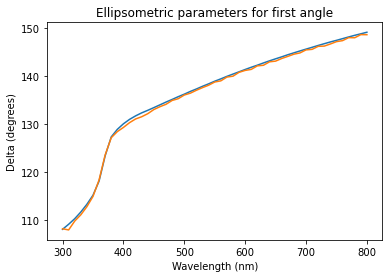

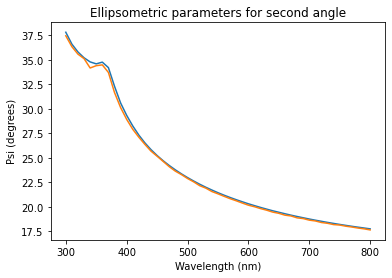

In [9]:
#print the MSE
print('MSE=',MSE(thickness))
# plot modeled and experimental delta
plt.figure()
plt.plot(lambda_list,delta_mod, raw_data.lambda_vac ,raw_data.delta_exp)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Delta (degrees)')
plt.title('Ellipsometric parameters for first angle');

# plot modeled and experimental psi
plt.figure()
plt.plot(lambda_list , psi_mod , raw_data.lambda_vac , raw_data.psi_exp)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Psi (degrees)')
plt.title('Ellipsometric parameters for second angle');